In [1]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/CourseraDataset-Clean.csv', engine='python', encoding='utf-8')
df

,course title,Rating,level,schedule,what you will learn,skill gain,modules,instructor,offered,keyword,Course Url,Duration to complete (Approx.),Number of Review
0,Fashion as Design,4.8,Beginner level,Flexible schedule,Not specified,"Art History, Art, History, Creativity","Introduction, Heroes, Silhouettes, Coutures, L...","Anna Burckhardt, Paola Antonelli, Michelle Mil...",The Museum of Modern Art,Arts and Humanities,https://www.coursera.org/learn/fashion-design,20.0,2813.0
1,Modern American Poetry,4.4,Beginner level,Flexible schedule,Not specified,Not specified,"Orientation, Module 1, Module 2, Module 3, Mod...",Cary Nelson,University of Illinois at Urbana-Champaign,Arts and Humanities,https://www.coursera.org/learn/modern-american...,34.0,100.0
2,Pixel Art for Video Games,4.5,Beginner level,Flexible schedule,Not specified,Not specified,"Week 1: Introduction to Pixel Art, Week 2: Pix...","Andrew Dennis, Ricardo Guimaraes",Michigan State University,Arts and Humanities,https://www.coursera.org/learn/pixel-art-video...,9.0,227.0
3,Distribución digital de la música independiente,0.0,Beginner level,Flexible schedule,Not specified,Not specified,"Semana 1, Semana 2, Semana 3, Semana 4",Eduardo de la Vara Brown.,SAE Institute México,Arts and Humanities,https://www.coursera.org/learn/distribucion-di...,8.0,0.0
4,The Blues: Understanding and Performing an Ame...,4.8,Beginner level,Flexible schedule,Students will be able to describe the blues as...,"Music, Chord, Jazz, Jazz Improvisation","Blues Progressions – Theory and Practice , Blu...",Dariusz Terefenko,University of Rochester,Arts and Humanities,https://www.coursera.org/learn/the-blues,11.0,582.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8384,Architecting with Google Kubernetes Engine: Pr...,4.9,Intermediate level,Flexible schedule,Not specified,Not specified,"Introducción al curso, Control de acceso y seg...",Google Cloud Training,Google Cloud,Social Sciences,https://www.coursera.org/learn/deploying-secur...,14.0,30.0
8385,Computational Thinking for K-12 Educators: Nes...,0.0,Beginner level,Flexible schedule,Not specified,"Education, want, Resource, Causality","Course Orientation, Nested If/Else Part 1, Nes...",Beth Simon,University of California San Diego,Social Sciences,https://www.coursera.org/learn/block-programmi...,11.0,0.0
8386,Cómo combinar y analizar datos complejos,0.0,Not specified,Flexible schedule,Not specified,Not specified,"Estimación básica, Modelos, Vinculación de reg...","Richard Valliant, Ph.D.","University of Maryland, College Park",Social Sciences,https://www.coursera.org/learn/data-collection...,9.0,0.0
8387,Architecting with Google Kubernetes Engine: Wo...,0.0,Intermediate level,Flexible schedule,Not specified,Not specified,"Introdução ao curso, Operações do Kubernetes, ...",Google Cloud Training,Google Cloud,Social Sciences,https://www.coursera.org/learn/deploying-workl...,19.0,0.0


In [2]:
df.drop(columns=['Course Url','instructor'] , inplace= True)

df.head()

,course title,Rating,level,schedule,what you will learn,skill gain,modules,offered,keyword,Duration to complete (Approx.),Number of Review
0,Fashion as Design,4.8,Beginner level,Flexible schedule,Not specified,"Art History, Art, History, Creativity","Introduction, Heroes, Silhouettes, Coutures, L...",The Museum of Modern Art,Arts and Humanities,20.0,2813.0
1,Modern American Poetry,4.4,Beginner level,Flexible schedule,Not specified,Not specified,"Orientation, Module 1, Module 2, Module 3, Mod...",University of Illinois at Urbana-Champaign,Arts and Humanities,34.0,100.0
2,Pixel Art for Video Games,4.5,Beginner level,Flexible schedule,Not specified,Not specified,"Week 1: Introduction to Pixel Art, Week 2: Pix...",Michigan State University,Arts and Humanities,9.0,227.0
3,Distribución digital de la música independiente,0.0,Beginner level,Flexible schedule,Not specified,Not specified,"Semana 1, Semana 2, Semana 3, Semana 4",SAE Institute México,Arts and Humanities,8.0,0.0
4,The Blues: Understanding and Performing an Ame...,4.8,Beginner level,Flexible schedule,Students will be able to describe the blues as...,"Music, Chord, Jazz, Jazz Improvisation","Blues Progressions – Theory and Practice , Blu...",University of Rochester,Arts and Humanities,11.0,582.0


In [3]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder



# Identify the columns containing categorical string variables that you want to encode
categorical_columns = ['level','keyword']

# Check if the categorical columns exist in the DataFrame
missing_columns = [col for col in categorical_columns if col not in df.columns]
if missing_columns:
    raise ValueError(f"The following columns are missing in the DataFrame: {missing_columns}")

# Initialize the OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform the categorical columns
encoded_data = encoder.fit_transform(df[categorical_columns])

# Create a new DataFrame with the transformed values
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(categorical_columns))

# Drop the original categorical columns from the DataFrame
df = df.drop(categorical_columns, axis=1)

# Concatenate the new DataFrame with the transformed values
df = pd.concat([df, encoded_df], axis=1)

print(df)

                                           course title Rating  \
0                                     Fashion as Design    4.8   
1                                Modern American Poetry    4.4   
2                             Pixel Art for Video Games    4.5   
3       Distribución digital de la música independiente    0.0   
4     The Blues: Understanding and Performing an Ame...    4.8   
...                                                 ...    ...   
8384  Architecting with Google Kubernetes Engine: Pr...    4.9   
8385  Computational Thinking for K-12 Educators: Nes...    0.0   
8386           Cómo combinar y analizar datos complejos    0.0   
8387  Architecting with Google Kubernetes Engine: Wo...    0.0   
8388                 Visualizing static networks with R    0.0   

               schedule                                what you will learn  \
0     Flexible schedule                                      Not specified   
1     Flexible schedule                            

In [4]:
# Check for null values in each column
null_columns = df.isnull().sum()

# Print the columns with null values
print("Columns with null values:")
print(null_columns[null_columns > 0])


Columns with null values:
course title                       4
Rating                             9
schedule                           9
what you will learn                9
skill gain                        19
modules                           50
offered                           19
Duration to complete (Approx.)    29
Number of Review                  29
dtype: int64


In [5]:
# Drop rows where 'column_name' has null values
df.dropna(subset=['course title','Rating','schedule','what you will learn','skill gain','modules','offered','Duration to complete (Approx.)','Number of Review'], inplace=True)
# Drop rows if they have at least 'thresh' non-null values
df.dropna(thresh=2, inplace=True)


In [6]:
# Check for null values in each row
null_rows = df.isnull().any(axis=1)

# Count the number of null rows
num_null_rows = null_rows.sum()

# Print the number of null rows
print("Number of null rows:", num_null_rows)


Number of null rows: 0


In [7]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
import re

In [8]:
# Convert all rows to lowercase
df = df.apply(lambda x: x.astype(str).str.lower())
df

,course title,Rating,schedule,what you will learn,skill gain,modules,offered,Duration to complete (Approx.),Number of Review,level_Advanced level,...,keyword_Business,keyword_Computer Science,keyword_DataScience,keyword_Health,keyword_Information Technology,keyword_Math and Logic,keyword_Personal Development,keyword_Physical Science and Engineering,keyword_Social Sciences,keyword_None
0,fashion as design,4.8,flexible schedule,not specified,"art history, art, history, creativity","introduction, heroes, silhouettes, coutures, l...",the museum of modern art,20.0,2813.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,modern american poetry,4.4,flexible schedule,not specified,not specified,"orientation, module 1, module 2, module 3, mod...",university of illinois at urbana-champaign,34.0,100.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,pixel art for video games,4.5,flexible schedule,not specified,not specified,"week 1: introduction to pixel art, week 2: pix...",michigan state university,9.0,227.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,distribución digital de la música independiente,0.0,flexible schedule,not specified,not specified,"semana 1, semana 2, semana 3, semana 4",sae institute méxico,8.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,the blues: understanding and performing an ame...,4.8,flexible schedule,students will be able to describe the blues as...,"music, chord, jazz, jazz improvisation","blues progressions – theory and practice , blu...",university of rochester,11.0,582.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8384,architecting with google kubernetes engine: pr...,4.9,flexible schedule,not specified,not specified,"introducción al curso, control de acceso y seg...",google cloud,14.0,30.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8385,computational thinking for k-12 educators: nes...,0.0,flexible schedule,not specified,"education, want, resource, causality","course orientation, nested if/else part 1, nes...",university of california san diego,11.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8386,cómo combinar y analizar datos complejos,0.0,flexible schedule,not specified,not specified,"estimación básica, modelos, vinculación de reg...","university of maryland, college park",9.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8387,architecting with google kubernetes engine: wo...,0.0,flexible schedule,not specified,not specified,"introdução ao curso, operações do kubernetes, ...",google cloud,19.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [9]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [10]:
# Remove stop words
stop_words = stopwords.words('english')
df = df.apply(lambda x: x.str.replace(r'\b(' + r'|'.join(stop_words) + r')\b', ''))
df

,course title,Rating,schedule,what you will learn,skill gain,modules,offered,Duration to complete (Approx.),Number of Review,level_Advanced level,...,keyword_Business,keyword_Computer Science,keyword_DataScience,keyword_Health,keyword_Information Technology,keyword_Math and Logic,keyword_Personal Development,keyword_Physical Science and Engineering,keyword_Social Sciences,keyword_None
0,fashion as design,4.8,flexible schedule,not specified,"art history, art, history, creativity","introduction, heroes, silhouettes, coutures, l...",the museum of modern art,20.0,2813.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,modern american poetry,4.4,flexible schedule,not specified,not specified,"orientation, module 1, module 2, module 3, mod...",university of illinois at urbana-champaign,34.0,100.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,pixel art for video games,4.5,flexible schedule,not specified,not specified,"week 1: introduction to pixel art, week 2: pix...",michigan state university,9.0,227.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,distribución digital de la música independiente,0.0,flexible schedule,not specified,not specified,"semana 1, semana 2, semana 3, semana 4",sae institute méxico,8.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,the blues: understanding and performing an ame...,4.8,flexible schedule,students will be able to describe the blues as...,"music, chord, jazz, jazz improvisation","blues progressions – theory and practice , blu...",university of rochester,11.0,582.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8384,architecting with google kubernetes engine: pr...,4.9,flexible schedule,not specified,not specified,"introducción al curso, control de acceso y seg...",google cloud,14.0,30.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8385,computational thinking for k-12 educators: nes...,0.0,flexible schedule,not specified,"education, want, resource, causality","course orientation, nested if/else part 1, nes...",university of california san diego,11.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8386,cómo combinar y analizar datos complejos,0.0,flexible schedule,not specified,not specified,"estimación básica, modelos, vinculación de reg...","university of maryland, college park",9.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8387,architecting with google kubernetes engine: wo...,0.0,flexible schedule,not specified,not specified,"introdução ao curso, operações do kubernetes, ...",google cloud,19.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [11]:
# Remove punctuation marks
df = df.apply(lambda x: x.str.replace(r'[^\w\s]+', ''))

In [12]:
def clean_text(text):
    # تحويل النص إلى حروف صغيرة
    text = text.lower()
    # إزالة علامات الترقيم والأرقام
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    # إزالة الأسطر الجديدة
    text = text.replace('\n', ' ')
    return text

In [13]:
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

# Download NLTK resources
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Instantiate stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Define preprocessing function
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Stemming or Lemmatization
    # You can choose either stemming or lemmatization based on your requirement
    # Here's an example of lemmatization
    # You can replace lemmatizer.lemmatize(word) with stemmer.stem(word) for stemming
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join tokens back into a string
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

# Apply preprocessing to the 'modules' column
df['preprocessed_modules'] = df['modules'].apply(preprocess_text)

# Display the DataFrame with preprocessed modules
print(df['preprocessed_modules'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


0       introduction hero silhouette couture lifecycle...
1         orientation module 1 module 2 module 3 module 4
2       week 1 introduction pixel art week 2 pixel art...
3                     semana 1 semana 2 semana 3 semana 4
4       blue progression – theory practice blue scale ...
                              ...                        
8384    introducción al curso control de acceso seguri...
8385    course orientation nested ifelse part 1 nested...
8386    estimación básica modelos vinculación de regis...
8387    introdução ao curso operações kubernetes impla...
8388                                     learn stepbystep
Name: preprocessed_modules, Length: 8329, dtype: object


In [14]:
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

# Download NLTK resources
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Instantiate stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Define preprocessing function
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Stemming or Lemmatization
    # You can choose either stemming or lemmatization based on your requirement
    # Here's an example of lemmatization
    # You can replace lemmatizer.lemmatize(word) with stemmer.stem(word) for stemming
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join tokens back into a string
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

# Apply preprocessing to the 'modules' column
df['preprocessed_skill gain'] = df['skill gain'].apply(preprocess_text)

# Display the DataFrame with preprocessed modules
print(df['preprocessed_skill gain'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0                      art history art history creativity
1                                               specified
2                                               specified
3                                               specified
4                     music chord jazz jazz improvisation
                              ...                        
8384                                            specified
8385                    education want resource causality
8386                                            specified
8387                                            specified
8388    network analysis igraph r programming graph dr...
Name: preprocessed_skill gain, Length: 8329, dtype: object


In [15]:
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

# Download NLTK resources
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Instantiate stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Define preprocessing function
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Stemming or Lemmatization
    # You can choose either stemming or lemmatization based on your requirement
    # Here's an example of lemmatization
    # You can replace lemmatizer.lemmatize(word) with stemmer.stem(word) for stemming
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join tokens back into a string
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

# Apply preprocessing to the 'modules' column
df['preprocessed_what you will learn'] = df['what you will learn'].apply(preprocess_text)

# Display the DataFrame with preprocessed modules
print(df['preprocessed_what you will learn'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0                                               specified
1                                               specified
2                                               specified
3                                               specified
4       student able describe blue important musical f...
                              ...                        
8384                                            specified
8385                                            specified
8386                                            specified
8387                                            specified
8388    learn preprocess raw data create node edgeslea...
Name: preprocessed_what you will learn, Length: 8329, dtype: object


In [16]:
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

# Download NLTK resources
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Instantiate stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Define preprocessing function
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Stemming or Lemmatization
    # You can choose either stemming or lemmatization based on your requirement
    # Here's an example of lemmatization
    # You can replace lemmatizer.lemmatize(word) with stemmer.stem(word) for stemming
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join tokens back into a string
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

# Apply preprocessing to the 'modules' column
df['preprocessed_offered'] = df['offered'].apply(preprocess_text)

# Display the DataFrame with preprocessed modules
print(df['preprocessed_offered'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0                         museum modern art
1       university illinois urbanachampaign
2                 michigan state university
3                      sae institute méxico
4                      university rochester
                       ...                 
8384                           google cloud
8385        university california san diego
8386       university maryland college park
8387                           google cloud
8388               coursera project network
Name: preprocessed_offered, Length: 8329, dtype: object


In [17]:
df.drop(columns=['what you will learn',	'skill gain',	'modules'] , inplace= True)

df.head()


,course title,Rating,schedule,offered,Duration to complete (Approx.),Number of Review,level_Advanced level,level_Beginner level,"level_Extra Element Theorem, Design example: SEPIC frequency responses, N Extra Element Theorem (NEET)","level_Grow Your Business with Goldman Sachs 10,000 Women",...,keyword_Information Technology,keyword_Math and Logic,keyword_Personal Development,keyword_Physical Science and Engineering,keyword_Social Sciences,keyword_None,preprocessed_modules,preprocessed_skill gain,preprocessed_what you will learn,preprocessed_offered
0,fashion as design,4.8,flexible schedule,the museum of modern art,20.0,2813.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,introduction hero silhouette couture lifecycle...,art history art history creativity,specified,museum modern art
1,modern american poetry,4.4,flexible schedule,university of illinois at urbana-champaign,34.0,100.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,orientation module 1 module 2 module 3 module 4,specified,specified,university illinois urbanachampaign
2,pixel art for video games,4.5,flexible schedule,michigan state university,9.0,227.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,week 1 introduction pixel art week 2 pixel art...,specified,specified,michigan state university
3,distribución digital de la música independiente,0.0,flexible schedule,sae institute méxico,8.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,semana 1 semana 2 semana 3 semana 4,specified,specified,sae institute méxico
4,the blues: understanding and performing an ame...,4.8,flexible schedule,university of rochester,11.0,582.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,blue progression – theory practice blue scale ...,music chord jazz jazz improvisation,student able describe blue important musical f...,university rochester


In [18]:
df.drop(columns=['offered'] , inplace= True)

df.head()

,course title,Rating,schedule,Duration to complete (Approx.),Number of Review,level_Advanced level,level_Beginner level,"level_Extra Element Theorem, Design example: SEPIC frequency responses, N Extra Element Theorem (NEET)","level_Grow Your Business with Goldman Sachs 10,000 Women",level_Intermediate level,...,keyword_Information Technology,keyword_Math and Logic,keyword_Personal Development,keyword_Physical Science and Engineering,keyword_Social Sciences,keyword_None,preprocessed_modules,preprocessed_skill gain,preprocessed_what you will learn,preprocessed_offered
0,fashion as design,4.8,flexible schedule,20.0,2813.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,introduction hero silhouette couture lifecycle...,art history art history creativity,specified,museum modern art
1,modern american poetry,4.4,flexible schedule,34.0,100.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,orientation module 1 module 2 module 3 module 4,specified,specified,university illinois urbanachampaign
2,pixel art for video games,4.5,flexible schedule,9.0,227.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,week 1 introduction pixel art week 2 pixel art...,specified,specified,michigan state university
3,distribución digital de la música independiente,0.0,flexible schedule,8.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,semana 1 semana 2 semana 3 semana 4,specified,specified,sae institute méxico
4,the blues: understanding and performing an ame...,4.8,flexible schedule,11.0,582.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,blue progression – theory practice blue scale ...,music chord jazz jazz improvisation,student able describe blue important musical f...,university rochester


In [19]:
y = df['Rating']
X = df.loc[: , df.columns != 'Rating']
df

,course title,Rating,schedule,Duration to complete (Approx.),Number of Review,level_Advanced level,level_Beginner level,"level_Extra Element Theorem, Design example: SEPIC frequency responses, N Extra Element Theorem (NEET)","level_Grow Your Business with Goldman Sachs 10,000 Women",level_Intermediate level,...,keyword_Information Technology,keyword_Math and Logic,keyword_Personal Development,keyword_Physical Science and Engineering,keyword_Social Sciences,keyword_None,preprocessed_modules,preprocessed_skill gain,preprocessed_what you will learn,preprocessed_offered
0,fashion as design,4.8,flexible schedule,20.0,2813.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,introduction hero silhouette couture lifecycle...,art history art history creativity,specified,museum modern art
1,modern american poetry,4.4,flexible schedule,34.0,100.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,orientation module 1 module 2 module 3 module 4,specified,specified,university illinois urbanachampaign
2,pixel art for video games,4.5,flexible schedule,9.0,227.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,week 1 introduction pixel art week 2 pixel art...,specified,specified,michigan state university
3,distribución digital de la música independiente,0.0,flexible schedule,8.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,semana 1 semana 2 semana 3 semana 4,specified,specified,sae institute méxico
4,the blues: understanding and performing an ame...,4.8,flexible schedule,11.0,582.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,blue progression – theory practice blue scale ...,music chord jazz jazz improvisation,student able describe blue important musical f...,university rochester
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8384,architecting with google kubernetes engine: pr...,4.9,flexible schedule,14.0,30.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,introducción al curso control de acceso seguri...,specified,specified,google cloud
8385,computational thinking for k-12 educators: nes...,0.0,flexible schedule,11.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,course orientation nested ifelse part 1 nested...,education want resource causality,specified,university california san diego
8386,cómo combinar y analizar datos complejos,0.0,flexible schedule,9.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,estimación básica modelos vinculación de regis...,specified,specified,university maryland college park
8387,architecting with google kubernetes engine: wo...,0.0,flexible schedule,19.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,introdução ao curso operações kubernetes impla...,specified,specified,google cloud


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train , y_test = train_test_split(X , y , test_size = 0.2)

In [21]:
X_train.isnull().sum()

course title                                                                                                                                                                                         0
schedule                                                                                                                                                                                             0
Duration to complete (Approx.)                                                                                                                                                                       0
Number of Review                                                                                                                                                                                     0
level_Advanced level                                                                                                                                                                                 0
level

In [22]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))
threshold = 5
tfidf_vectorizer = TfidfVectorizer()

section_size = 1000
sections = [df[i:i+section_size] for i in range(0, df.shape[0], section_size)]
X_tfidf_sections = []

for df in sections:
    cleaned_texts_no_stopwords = []
    for text in df['course title'].tolist():
        tokens = word_tokenize(text)
        filtered_text = [word for word in tokens if word.lower() not in stop_words]
        cleaned_texts_no_stopwords.append(' '.join(filtered_text))

    word_counts = Counter([word for text in cleaned_texts_no_stopwords for word in text.split()])

    cleaned_texts_no_stopwords_low_freq = []
    for text in cleaned_texts_no_stopwords:
        filtered_text = ' '.join([word for word in text.split() if word_counts[word] <= threshold])
        cleaned_texts_no_stopwords_low_freq.append(filtered_text)

    X_tfidf_section = tfidf_vectorizer.fit_transform(cleaned_texts_no_stopwords_low_freq)
    X_tfidf_sections.append(X_tfidf_section)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [23]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
numerical_column = label_encoder.fit_transform(df['course title'])

X_tfidf_section = tfidf_vectorizer.fit_transform(cleaned_texts_no_stopwords_low_freq)
X_tfidf_section = X_tfidf_section.astype(float)  # Ensure the data type is float
X_tfidf_section[:, 0] = numerical_column  # Replace the first column with the numerical representation
X_tfidf_sections.append(X_tfidf_section)

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:143: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


In [24]:
X_tfidf_sections

[<1000x1529 sparse matrix of type '<class 'numpy.float64'>'
 	with 2293 stored elements in Compressed Sparse Row format>,
 <1000x1095 sparse matrix of type '<class 'numpy.float64'>'
 	with 1773 stored elements in Compressed Sparse Row format>,
 <1000x1083 sparse matrix of type '<class 'numpy.float64'>'
 	with 1782 stored elements in Compressed Sparse Row format>,
 <1000x1429 sparse matrix of type '<class 'numpy.float64'>'
 	with 2259 stored elements in Compressed Sparse Row format>,
 <1000x1501 sparse matrix of type '<class 'numpy.float64'>'
 	with 2297 stored elements in Compressed Sparse Row format>,
 <1000x1476 sparse matrix of type '<class 'numpy.float64'>'
 	with 2383 stored elements in Compressed Sparse Row format>,
 <1000x1780 sparse matrix of type '<class 'numpy.float64'>'
 	with 2734 stored elements in Compressed Sparse Row format>,
 <1000x1733 sparse matrix of type '<class 'numpy.float64'>'
 	with 2643 stored elements in Compressed Sparse Row format>,
 <329x949 sparse matrix 

In [25]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
numerical_column = label_encoder.fit_transform(df['course title'])

X_tfidf_section = tfidf_vectorizer.fit_transform(cleaned_texts_no_stopwords_low_freq)
X_tfidf_section = X_tfidf_section.astype(float)  # Ensure the data type is float
X_tfidf_section[:, 0] = numerical_column  # Replace the first column with the numerical representation
X_tfidf_sections.append(X_tfidf_section)

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:143: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


In [26]:
# Assuming you want to change the 'Course Title' column to a numerical representation
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

label_encoder = LabelEncoder()
numerical_column = label_encoder.fit_transform(df['course title'])
numerical_column = numerical_column.reshape(-1, 1)  # Reshape the array to match the shape of X_tfidf_section

X_tfidf_section = tfidf_vectorizer.fit_transform(cleaned_texts_no_stopwords_low_freq)
X_tfidf_section = X_tfidf_section.astype(float)  # Ensure the data type is float
X_tfidf_section = X_tfidf_section.todense()  # Convert sparse matrix to dense matrix
X_tfidf_section[:, 0] = numerical_column  # Replace the first column with the numerical representation
X_tfidf_section = sparse.csr_matrix(X_tfidf_section)  # Convert back to sparse matrix if needed
X_tfidf_sections.append(X_tfidf_section)

In [27]:
# Print the modified column in X_tfidf_section
print(X_tfidf_section[:, 0])

# Access the modified column in X_tfidf_section and convert it to an array
modified_column = X_tfidf_section[:, 0].toarray().flatten()
print(modified_column)

  (0, 0)	26.0
  (1, 0)	79.0
  (2, 0)	40.0
  (3, 0)	245.0
  (4, 0)	194.0
  (5, 0)	8.0
  (6, 0)	311.0
  (7, 0)	294.0
  (8, 0)	49.0
  (9, 0)	213.0
  (10, 0)	28.0
  (11, 0)	278.0
  (12, 0)	156.0
  (13, 0)	207.0
  (14, 0)	69.0
  (15, 0)	131.0
  (16, 0)	282.0
  (17, 0)	236.0
  (18, 0)	92.0
  (19, 0)	121.0
  (20, 0)	219.0
  (21, 0)	124.0
  (22, 0)	258.0
  (23, 0)	74.0
  (24, 0)	72.0
  :	:
  (304, 0)	320.0
  (305, 0)	77.0
  (306, 0)	101.0
  (307, 0)	46.0
  (308, 0)	222.0
  (309, 0)	303.0
  (310, 0)	267.0
  (311, 0)	220.0
  (312, 0)	217.0
  (313, 0)	94.0
  (314, 0)	244.0
  (315, 0)	188.0
  (316, 0)	139.0
  (317, 0)	53.0
  (318, 0)	293.0
  (319, 0)	136.0
  (320, 0)	270.0
  (321, 0)	269.0
  (322, 0)	63.0
  (323, 0)	199.0
  (324, 0)	15.0
  (325, 0)	65.0
  (326, 0)	89.0
  (327, 0)	16.0
  (328, 0)	314.0
[ 26.  79.  40. 245. 194.   8. 311. 294.  49. 213.  28. 278. 156. 207.
  69. 131. 282. 236.  92. 121. 219. 124. 258.  74.  72.   9.  48. 214.
  19.  82. 230. 113. 318. 147.  12.  71. 144. 259.  90. 1

In [28]:
# Assuming you want to change the 'Course Title' column to a numerical representation
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
numerical_column = label_encoder.fit_transform(df['course title'])
numerical_column = numerical_column.reshape(-1, 1)  # Reshape the array to match the shape of X_tfidf_section

X_tfidf_section = tfidf_vectorizer.fit_transform(cleaned_texts_no_stopwords_low_freq)
X_tfidf_section = X_tfidf_section.astype(float)  # Ensure the data type is float
X_tfidf_section = X_tfidf_section.todense()  # Convert sparse matrix to dense matrix
X_tfidf_section[:, 0] = numerical_column  # Replace the first column with the numerical representation

# Update the original DataFrame with the modified column
df['Numerical CourseTitle'] = numerical_column

# Save the updated DataFrame to a file
df.to_csv('CourseraDataset-Clean.csv', index=False)

<ipython-input-28-4922793c825b>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Numerical CourseTitle'] = numerical_column


In [29]:
# Assuming you want to change the 'Course Title' column to a numerical representation
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
numerical_column = label_encoder.fit_transform(df['preprocessed_offered'])
numerical_column = numerical_column.reshape(-1, 1)  # Reshape the array to match the shape of X_tfidf_section

X_tfidf_section = tfidf_vectorizer.fit_transform(cleaned_texts_no_stopwords_low_freq)
X_tfidf_section = X_tfidf_section.astype(float)  # Ensure the data type is float
X_tfidf_section = X_tfidf_section.todense()  # Convert sparse matrix to dense matrix
X_tfidf_section[:, 0] = numerical_column  # Replace the first column with the numerical representation

# Update the original DataFrame with the modified column
df['Numerical preprocessed_offered'] = numerical_column

# Save the updated DataFrame to a file
df.to_csv('CourseraDataset-Clean.csv', index=False)

<ipython-input-29-ca240e6776f5>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Numerical preprocessed_offered'] = numerical_column


In [30]:
# Assuming you want to change the 'Course Title' column to a numerical representation
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
numerical_column = label_encoder.fit_transform(df['preprocessed_modules'])
numerical_column = numerical_column.reshape(-1, 1)  # Reshape the array to match the shape of X_tfidf_section

X_tfidf_section = tfidf_vectorizer.fit_transform(cleaned_texts_no_stopwords_low_freq)
X_tfidf_section = X_tfidf_section.astype(float)  # Ensure the data type is float
X_tfidf_section = X_tfidf_section.todense()  # Convert sparse matrix to dense matrix
X_tfidf_section[:, 0] = numerical_column  # Replace the first column with the numerical representation

# Update the original DataFrame with the modified column
df['Numerical preprocessed_modules'] = numerical_column

# Save the updated DataFrame to a file
df.to_csv('CourseraDataset-Clean.csv', index=False)

<ipython-input-30-90cfde8617dc>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Numerical preprocessed_modules'] = numerical_column


In [31]:
# Assuming you want to change the 'Course Title' column to a numerical representation
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
numerical_column = label_encoder.fit_transform(df['preprocessed_skill gain'])
numerical_column = numerical_column.reshape(-1, 1)  # Reshape the array to match the shape of X_tfidf_section

X_tfidf_section = tfidf_vectorizer.fit_transform(cleaned_texts_no_stopwords_low_freq)
X_tfidf_section = X_tfidf_section.astype(float)  # Ensure the data type is float
X_tfidf_section = X_tfidf_section.todense()  # Convert sparse matrix to dense matrix
X_tfidf_section[:, 0] = numerical_column  # Replace the first column with the numerical representation

# Update the original DataFrame with the modified column
df['Numerical preprocessed_skill gain'] = numerical_column

# Save the updated DataFrame to a file
df.to_csv('CourseraDataset-Clean.csv', index=False)

<ipython-input-31-8e8932b65364>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Numerical preprocessed_skill gain'] = numerical_column


In [32]:
# Assuming you want to change the 'Course Title' column to a numerical representation
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
numerical_column = label_encoder.fit_transform(df['preprocessed_what you will learn'])
numerical_column = numerical_column.reshape(-1, 1)  # Reshape the array to match the shape of X_tfidf_section

X_tfidf_section = tfidf_vectorizer.fit_transform(cleaned_texts_no_stopwords_low_freq)
X_tfidf_section = X_tfidf_section.astype(float)  # Ensure the data type is float
X_tfidf_section = X_tfidf_section.todense()  # Convert sparse matrix to dense matrix
X_tfidf_section[:, 0] = numerical_column  # Replace the first column with the numerical representation

# Update the original DataFrame with the modified column
df['Numerical preprocessed_whatyouwilllearn'] = numerical_column

# Save the updated DataFrame to a file
df.to_csv('CourseraDataset-Clean.csv', index=False)

<ipython-input-32-abff249e366e>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Numerical preprocessed_whatyouwilllearn'] = numerical_column


In [33]:
df.drop(columns=['preprocessed_what you will learn','preprocessed_skill gain','preprocessed_modules','course title','preprocessed_offered'] , inplace= True)


<ipython-input-33-2b90cf9836ba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['preprocessed_what you will learn','preprocessed_skill gain','preprocessed_modules','course title','preprocessed_offered'] , inplace= True)


,Rating,schedule,Duration to complete (Approx.),Number of Review,level_Advanced level,level_Beginner level,"level_Extra Element Theorem, Design example: SEPIC frequency responses, N Extra Element Theorem (NEET)","level_Grow Your Business with Goldman Sachs 10,000 Women",level_Intermediate level,"level_Introduction to Overall Response of Structures, Loads, Building Response, and Resonance, Building a Cardboard Chair",...,keyword_Math and Logic,keyword_Personal Development,keyword_Physical Science and Engineering,keyword_Social Sciences,keyword_None,Numerical CourseTitle,Numerical preprocessed_offered,Numerical preprocessed_modules,Numerical preprocessed_skill gain,Numerical preprocessed_whatyouwilllearn
8060,4.7,flexible schedule,9.0,241.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,26,33,117,118,113
8061,4.7,flexible schedule,19.0,76.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,79,29,243,81,113
8062,4.9,flexible schedule,18.0,266.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,40,8,129,118,113
8063,4.8,flexible schedule,25.0,34.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,245,51,174,118,56
8064,4.6,flexible schedule,13.0,83.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,194,14,135,118,113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8384,4.9,flexible schedule,14.0,30.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,15,21,104,118,113
8385,0.0,flexible schedule,11.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,65,67,48,52,113
8386,0.0,flexible schedule,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,89,82,70,118,113
8387,0.0,flexible schedule,19.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,16,21,154,118,113


In [34]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['schedule'] = label_encoder.fit_transform(df['schedule'])

<ipython-input-34-7bd32f0ff002>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['schedule'] = label_encoder.fit_transform(df['schedule'])


In [35]:
df

,Rating,schedule,Duration to complete (Approx.),Number of Review,level_Advanced level,level_Beginner level,"level_Extra Element Theorem, Design example: SEPIC frequency responses, N Extra Element Theorem (NEET)","level_Grow Your Business with Goldman Sachs 10,000 Women",level_Intermediate level,"level_Introduction to Overall Response of Structures, Loads, Building Response, and Resonance, Building a Cardboard Chair",...,keyword_Math and Logic,keyword_Personal Development,keyword_Physical Science and Engineering,keyword_Social Sciences,keyword_None,Numerical CourseTitle,Numerical preprocessed_offered,Numerical preprocessed_modules,Numerical preprocessed_skill gain,Numerical preprocessed_whatyouwilllearn
8060,4.7,0,9.0,241.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,26,33,117,118,113
8061,4.7,0,19.0,76.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,79,29,243,81,113
8062,4.9,0,18.0,266.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,40,8,129,118,113
8063,4.8,0,25.0,34.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,245,51,174,118,56
8064,4.6,0,13.0,83.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,194,14,135,118,113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8384,4.9,0,14.0,30.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,15,21,104,118,113
8385,0.0,0,11.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,65,67,48,52,113
8386,0.0,0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,89,82,70,118,113
8387,0.0,0,19.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,16,21,154,118,113


### ***`BestDecisionTree_Result`***

In [36]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming 'Schedule' is the feature column and 'Rating' is the target column
X = df.loc[:, df.columns != 'Rating']
y = df['Rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate and fit the Decision Tree Regression model
regressor = DecisionTreeRegressor(max_depth=5, min_samples_split=10, random_state=42)
regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = regressor.predict(X_test)

# Evaluate the model using mean squared error and mean absolute error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

# Calculate train and test scores
train_score = regressor.score(X_train, y_train)
test_score = regressor.score(X_test, y_test)

print("Train Score:", train_score)
print("Test Score:", test_score)

# Print the first 5 predicted values
print("Predicted Values:")
print(y_pred[:5])

Mean Squared Error: 0.06420205686545422
Mean Absolute Error: 0.128554862482443
Train Score: 0.9946355533716565
Test Score: 0.9872161942388287
Predicted Values:
[4.73692308 4.80714286 4.80714286 4.0875     4.73692308]


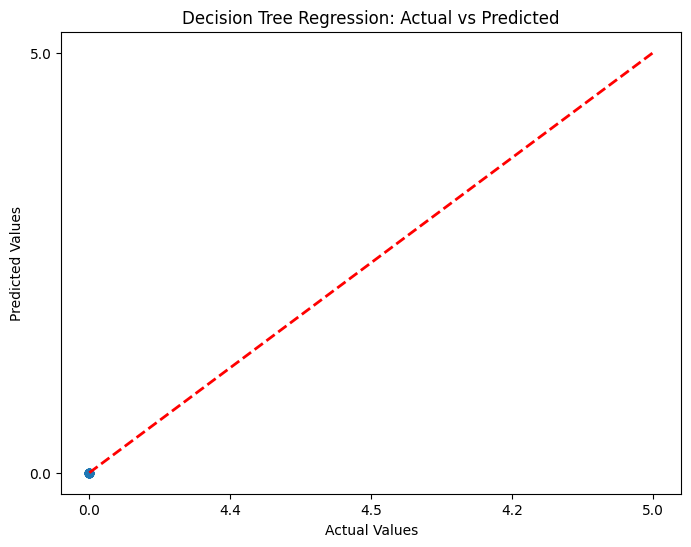

In [37]:
import matplotlib.pyplot as plt

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Decision Tree Regression: Actual vs Predicted')
plt.show()

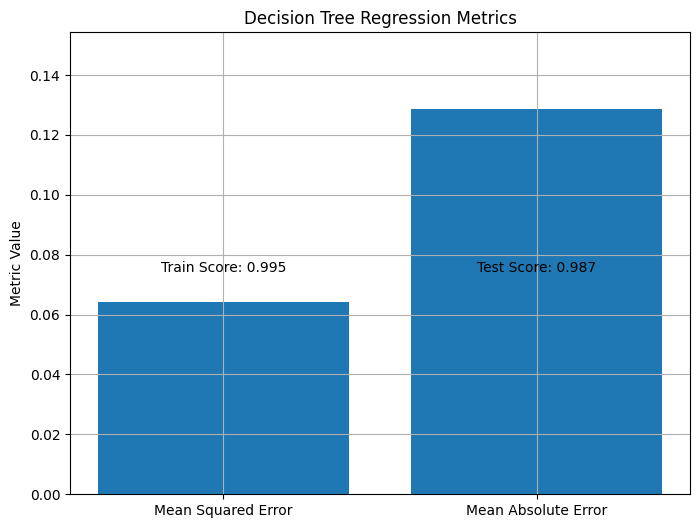

In [38]:
import matplotlib.pyplot as plt

# Define the metrics
mse: 0.06420205686545422
mae: 0.128554862482443
train_score: 0.9946355533716565
test_score: 0.9872161942388287

# Create the figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the metrics
ax.bar(['Mean Squared Error', 'Mean Absolute Error'], [mse, mae])
ax.set_ylabel('Metric Value')
ax.set_title('Decision Tree Regression Metrics')

# Add the train and test scores
ax.text(0, mse + 0.01, f'Train Score: {train_score:.3f}', ha='center')
ax.text(1, mse + 0.01, f'Test Score: {test_score:.3f}', ha='center')

# Customize the plot
ax.grid(True)
ax.set_ylim(0, max(mse, mae) * 1.2)
plt.show()

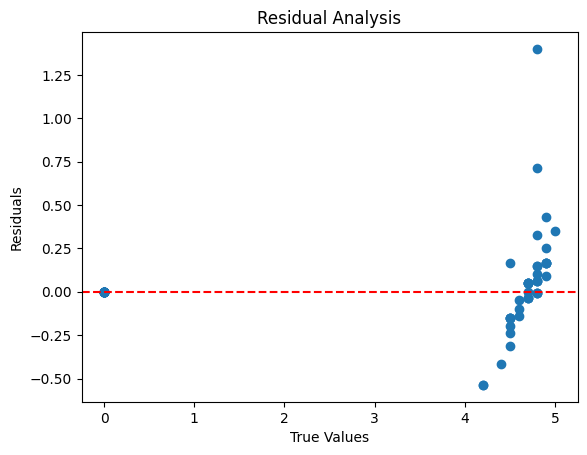

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert y_test and y_pred to numeric types
y_test = pd.to_numeric(y_test)
y_pred = pd.to_numeric(y_pred)

# Perform residual analysis
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.title('Residual Analysis')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()


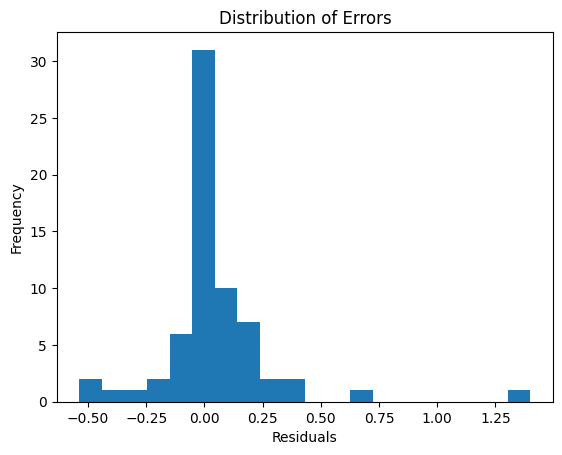

In [41]:
plt.hist(residuals, bins=20)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Errors')
plt.show()

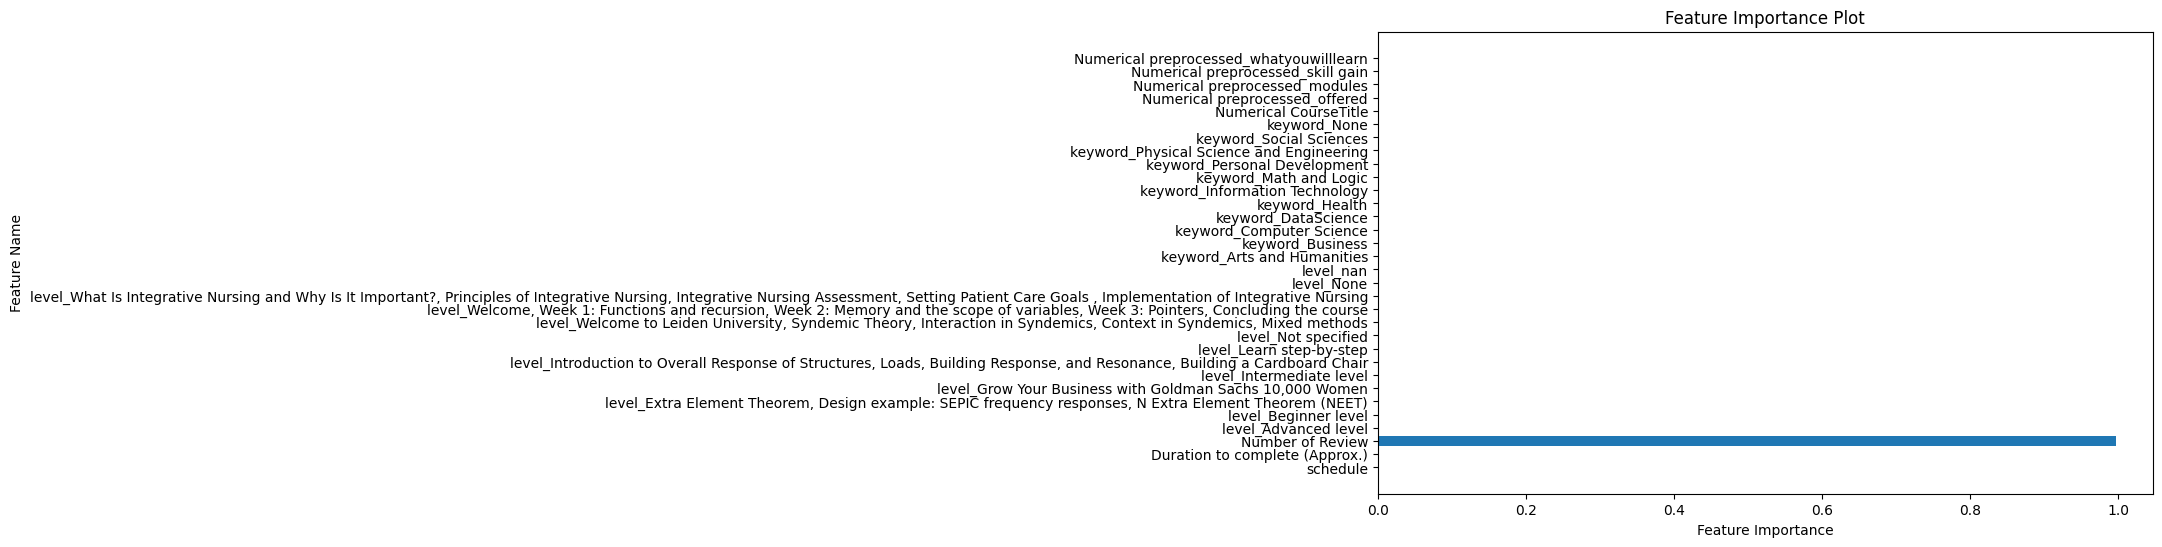

In [42]:
feature_importances = regressor.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importance Plot')
plt.show()

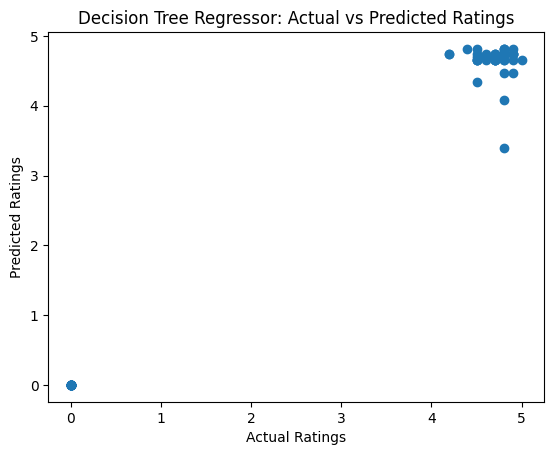

In [43]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted ratings
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Decision Tree Regressor: Actual vs Predicted Ratings')
plt.show()

### ***`BEStSVR_RESULT`***

In [44]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming 'Rating' is the target column and all other columns are features
X =df.loc[:, df.columns != 'Rating']
y = df['Rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate and fit the SVR model with the RBF kernel
regressor = SVR(kernel='rbf', C=50, gamma='scale')  # Adjust C and gamma as needed
regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = regressor.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate the R-squared score
r2_score = regressor.score(X_test, y_test)
print("R-squared Score:", r2_score)

# Calculate the training and testing scores
train_score = regressor.score(X_train, y_train)
test_score = regressor.score(X_test, y_test)

print("Training Score:", train_score)
print("Testing Score:", test_score)

Mean Squared Error: 1.9730367304622785
R-squared Score: 0.6071322391626022
Training Score: 0.6086257358249796
Testing Score: 0.6071322391626022


In [50]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming 'Rating' is the target column and all other columns are features
X = df.loc[:, df.columns != 'Rating']
y = df['Rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate and fit the SVR model with the RBF kernel
regressor = SVR(kernel='rbf', C=50, gamma='scale')  # Adjust C and gamma as needed
regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = regressor.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate the R-squared score
r2_score = regressor.score(X_test, y_test)
print("R-squared Score:", r2_score)

# Calculate the training and testing scores
train_score = regressor.score(X_train, y_train)
test_score = regressor.score(X_test, y_test)
print("Training Score:", train_score)
print("Testing Score:", test_score)

# Make predictions for new data points
new_data_point = [[5]]  # Replace value_1, value_2, ... with the actual values of features
predicted_rating = regressor.predict(new_data_point)
print("Predicted Rating for the New Data Point:", predicted_rating)

Mean Squared Error: 1.9730367304622785
R-squared Score: 0.6071322391626022
Training Score: 0.6086257358249796
Testing Score: 0.6071322391626022


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


ValueError: X has 1 features, but SVR is expecting 32 features as input.

In [47]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming 'Rating' is the target column and all other columns are features
X = df.loc[:, df.columns != 'Rating']
y = df['Rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate and fit the SVR model with the RBF kernel
regressor = SVR(kernel='rbf', C=50, gamma='scale')  # Adjust C and gamma as needed
regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = regressor.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate the R-squared score
r2_score = regressor.score(X_test, y_test)
print("R-squared Score:", r2_score)

# Calculate the training and testing scores
train_score = regressor.score(X_train, y_train)
test_score = regressor.score(X_test, y_test)
print("Training Score:", train_score)
print("Testing Score:", test_score)

# Print the first 5 predicted values
print("Predicted Values:")
print(y_pred[:5])


Mean Squared Error: 1.9730367304622785
R-squared Score: 0.6071322391626022
Training Score: 0.6086257358249796
Testing Score: 0.6071322391626022
Predicted Values:
[5.46329778 5.12624789 4.70348673 1.43721673 3.89318808]


Mean Squared Error: 1.9730367304622785
Mean Absolute Error: 1.0642848973258614
R-squared Score: 0.6071322391626022
Training Score: 0.6086257358249796
Testing Score: 0.6071322391626022
Predicted Values:
[5.46329778 5.12624789 4.70348673 1.43721673 3.89318808]


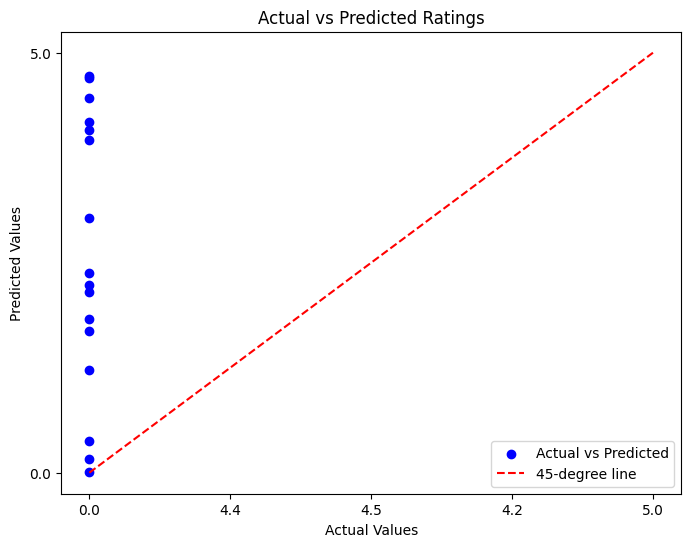

In [60]:
# Import the necessary libraries
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'Rating' is the target column
X = df.drop(columns=['Rating'])
y = df['Rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate and fit the SVR model with the RBF kernel
regressor = SVR(kernel='rbf', C=50, gamma='scale')  # Adjust C and gamma as needed
regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = regressor.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Evaluate the model using mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)

# Calculate the training and testing scores
train_score = regressor.score(X_train, y_train)
test_score = regressor.score(X_test, y_test)
print("Training Score:", train_score)
print("Testing Score:", test_score)

# Print the first 5 predicted values
print("Predicted Values:")
print(y_pred[:5])

# Plotting Actual vs Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')

# Plotting the 45-degree line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='45-degree line')

# Adding labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Ratings')

# Adding legend
plt.legend()

# Display the plot
plt.show()


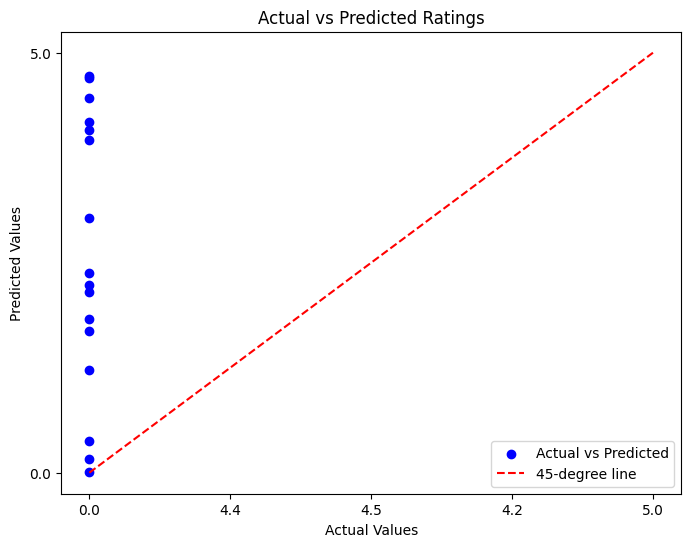

In [51]:
import matplotlib.pyplot as plt

# Plotting the actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')

# Plotting the 45-degree line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='45-degree line')

# Adding labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Ratings')

# Adding legend
plt.legend()

# Display the plot
plt.show()


### **`*BESTKNEAREST*`**

In [52]:
# Import the necessary libraries
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Convert y_train and y_test to numerical data types
y_train = y_train.astype(float)
y_test = y_test.astype(float)

# Create the K-Nearest Neighbors regressor model with more neighbors
knn = KNeighborsRegressor(n_neighbors=10,metric='manhattan',algorithm='brute')

# Train the model
knn.fit(X_train, y_train)

# Make predictions on the train and test sets
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Evaluate the model using mean squared error, mean absolute error, and R-squared
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Train Mean Squared Error:", train_mse)
print("Test Mean Squared Error:", test_mse)
print("Train Mean Absolute Error:", train_mae)
print("Test Mean Absolute Error:", test_mae)
print("Train R-squared:", train_r2)
print("Test R-squared:", test_r2)

Train Mean Squared Error: 1.6848631178707225
Test Mean Squared Error: 1.8773363636363636
Train Mean Absolute Error: 0.9726996197718631
Test Mean Absolute Error: 1.0781818181818184
Train R-squared: 0.6119507638896566
Test R-squared: 0.6261879355141879


Train Mean Squared Error: 1.6848631178707225
Test Mean Squared Error: 1.8773363636363636
Train Mean Absolute Error: 0.9726996197718631
Test Mean Absolute Error: 1.0781818181818184
Train R-squared: 0.6119507638896566
Test R-squared: 0.6261879355141879


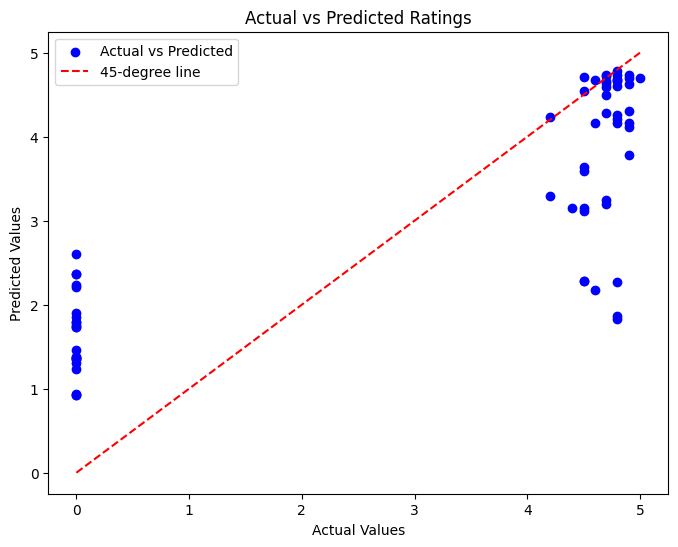

In [59]:
# Import the necessary libraries
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'Rating' is the target column
X = df.drop(columns=['Rating'])
y = df['Rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure y_train and y_test are of type float
y_train = y_train.astype(float)
y_test = y_test.astype(float)

# Create the K-Nearest Neighbors regressor model
knn = KNeighborsRegressor(n_neighbors=10, metric='manhattan', algorithm='brute')

# Train the model
knn.fit(X_train, y_train)

# Make predictions on the train and test sets
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Evaluate the model using mean squared error, mean absolute error, and R-squared
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Train Mean Squared Error:", train_mse)
print("Test Mean Squared Error:", test_mse)
print("Train Mean Absolute Error:", train_mae)
print("Test Mean Absolute Error:", test_mae)
print("Train R-squared:", train_r2)
print("Test R-squared:", test_r2)

# Plotting Actual vs Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, color='blue', label='Actual vs Predicted')

# Plotting the 45-degree line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='45-degree line')

# Adding labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Ratings')

# Adding legend
plt.legend()

# Display the plot
plt.show()


In [53]:
# Import the necessary libraries
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Convert y_train and y_test to numerical data types
y_train = y_train.astype(float)
y_test = y_test.astype(float)

# Create the K-Nearest Neighbors regressor model with more neighbors
knn = KNeighborsRegressor(n_neighbors=5,metric='manhattan',algorithm='brute')

# Train the model
knn.fit(X_train, y_train)

# Make predictions on the train and test sets
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Evaluate the model using mean squared error, mean absolute error, and R-squared
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Train Mean Squared Error:", train_mse)
print("Test Mean Squared Error:", test_mse)
print("Train Mean Absolute Error:", train_mae)
print("Test Mean Absolute Error:", test_mae)
print("Train R-squared:", train_r2)
print("Test R-squared:", test_r2)

Train Mean Squared Error: 1.4447102661596958
Test Mean Squared Error: 1.4936303030303029
Train Mean Absolute Error: 0.7929277566539925
Test Mean Absolute Error: 0.8881818181818183
Train R-squared: 0.6672615660953316
Test R-squared: 0.7025908420199997


In [57]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt


Train Mean Squared Error: 1.4447102661596958
Test Mean Squared Error: 1.4936303030303029
Train Mean Absolute Error: 0.7929277566539925
Test Mean Absolute Error: 0.8881818181818183
Train R-squared: 0.6672615660953316
Test R-squared: 0.7025908420199997


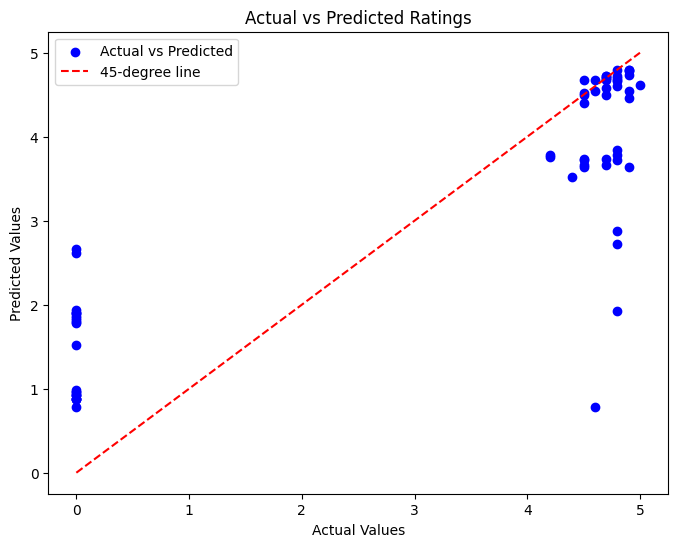

In [58]:
# Assuming 'df' is your DataFrame and 'Rating' is the target column
X = df.drop(columns=['Rating'])
y = df['Rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure y_train and y_test are of type float
y_train = y_train.astype(float)
y_test = y_test.astype(float)

# Create the K-Nearest Neighbors regressor model
knn = KNeighborsRegressor(n_neighbors=5, metric='manhattan', algorithm='brute')

# Train the model
knn.fit(X_train, y_train)

# Make predictions on the train and test sets
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Evaluate the model using mean squared error, mean absolute error, and R-squared
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Train Mean Squared Error:", train_mse)
print("Test Mean Squared Error:", test_mse)
print("Train Mean Absolute Error:", train_mae)
print("Test Mean Absolute Error:", test_mae)
print("Train R-squared:", train_r2)
print("Test R-squared:", test_r2)

# Plotting Actual vs Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, color='blue', label='Actual vs Predicted')

# Plotting the 45-degree line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='45-degree line')

# Adding labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Ratings')

# Adding legend
plt.legend()

# Display the plot
plt.show()


### ***`BESTRANDOMFOREST`***

In [54]:
# Import the necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Convert y_train and y_test to numerical data types
y_train = y_train.astype(float)
y_test = y_test.astype(float)

# Create the Random Forest Regressor model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions on the train and test sets
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Evaluate the model using mean squared error, mean absolute error, and R-squared
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Train Mean Squared Error:", train_mse)
print("Test Mean Squared Error:", test_mse)
print("Train Mean Absolute Error:", train_mae)
print("Test Mean Absolute Error:", test_mae)
print("Train R-squared:", train_r2)
print("Test R-squared:", test_r2)

Train Mean Squared Error: 0.006795866920152094
Test Mean Squared Error: 0.038299560606060504
Train Mean Absolute Error: 0.04840684410646405
Test Mean Absolute Error: 0.11601515151515131
Train R-squared: 0.9984348099622448
Test R-squared: 0.9923738558010353


In [55]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt


Train Mean Squared Error: 0.006795866920152094
Test Mean Squared Error: 0.038299560606060504
Train Mean Absolute Error: 0.04840684410646405
Test Mean Absolute Error: 0.11601515151515131
Train R-squared: 0.9984348099622448
Test R-squared: 0.9923738558010353


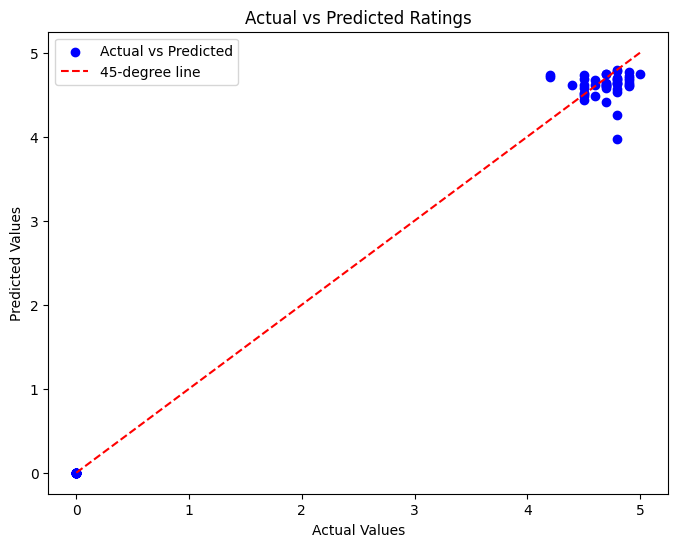

In [56]:
# Assuming 'df' is your DataFrame and 'Rating' is the target column
X = df.drop(columns=['Rating'])
y = df['Rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure y_train and y_test are of type float
y_train = y_train.astype(float)
y_test = y_test.astype(float)

# Create the Random Forest Regressor model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions on the train and test sets
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Evaluate the model using mean squared error, mean absolute error, and R-squared
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Train Mean Squared Error:", train_mse)
print("Test Mean Squared Error:", test_mse)
print("Train Mean Absolute Error:", train_mae)
print("Test Mean Absolute Error:", test_mae)
print("Train R-squared:", train_r2)
print("Test R-squared:", test_r2)

# Plotting Actual vs Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, color='blue', label='Actual vs Predicted')

# Plotting the 45-degree line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='45-degree line')

# Adding labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Ratings')

# Adding legend
plt.legend()

# Display the plot
plt.show()
